# Radiation Heat Transfer and Climate Change

Peter Godart ([ptgodart@mit.edu](mailto:ptgodart@mit.edu))

**Goal**: Use the First Law of Thermodynamics and the constitutive relationships for radiative heat transfer to evaluate the effect of an atmosphere on the average mean surface temperature of the Earth. We also want to answer why the annual increase of the concentration of carbon dioxide in the atmosphere due to human activity is driving climate change.

As we usually do with thermodynamics, we first approach this problem by defining our system and control volume. Because we want to evaluate how the atmosphere influences the global mean surface temperature, let's begin by considering the Earth *without an atmosphere*. For this problem, our system and control volume are defined as in the following graphic:

<img src="https://i.imgur.com/PrjeY0r.png" width="300px"></img>

For this control volume, which includes the Earth and everything within in and also excludes the Sun, we can write the First Law for a small transfer of thermal energy from the sun, $\Delta Q_{solar}$. The corresponding change in internal energy, $\delta U$, is given as:

$$\Delta U = \Delta Q_{net} - \Delta W_{net}$$

and immediately cross out $\Delta W$ since no work is being done by the boundary of the control volume, giving us:

$$\Delta U = \Delta Q_{net} = \Delta Q_{in} - \Delta Q_{out}$$

While familiar, this problem is different from others we have looked at previously, as heat is constantly being transferred into and out of the control volume via radiation. We are interested particularly in what happens to the control volume in *steady state*. To gain some more information, we can apply a simple mathetical trick. Let's imagine the heat transfer occurs in a finite amount of time, $\Delta t$, we can then divide both of the First Law equation by $\Delta t$: 

$$\frac{\Delta U}{\Delta t} = \frac{\Delta Q_{in}}{\Delta t} - \frac{\Delta Q_{out}}{\Delta t}$$

Taking the limit as $\Delta t \rightarrow 0$, we get the time derivatives of each quantity in this energy balance:

$$\frac{d}{dt} U = \frac{d}{dt}Q_{in} - \frac{d}{dt}Q_{out}$$

which is also typically called a power balance since both sides have units of power, [J/s]. By definition, we take steady state to be where $\frac{d}{dt}U \rightarrow 0$, and thus:

$$\frac{d}{dt}Q_{in} = \frac{d}{dt}Q_{out}$$

$$\textrm{Power in} = \textrm{Power out}$$

Estimating surface temperature of the Earth with and without an atmosphere:

$$P_{in} = P_{out}$$
$$(1 - \alpha) \cdot S \cdot \pi r_e^2 = \sigma T_e^4 \cdot 4\pi r_e^2$$
$$\Rightarrow T_e = \left( \frac{(1-\alpha) \cdot S}{4\sigma} \right)^{1/4}$$

In [ ]:
S = 1370 # W/m^2
albedo = 0.3
sigma = 5.67e-8 # W/m^2-K
T_e = ((1-albedo)*S/(4*sigma))**(1/4) # K

print(f'T_e = {T_e:0.3g} K ({T_e - 273.15:0.3g} degC)')

T_e = 255 K (-18.1 degC)


What happens when we add an atmosphere? We now have two control volumes we need to take care of:

<img src="https://brian-rose.github.io/ClimateLaboratoryBook/_images/1layerAtm_sketch.png" width="450px"/> [1]

Energy balance for the atmosphere:

$$2A_{out}\sigma \varepsilon T_a^4 = A_{out}\sigma T_s^4$$

Energy balance for the surface:

$$(1-\alpha)\cdot S A_{in} + \sigma \varepsilon T_a^4 A_{out} = \sigma T_s^4 A_{out}$$

Combining gives us:

$$(1-\alpha)\cdot S + \frac{1}{2} 4 \sigma T_s^4 = 4\sigma T_s^4$$
$$\Rightarrow T_s = \left(\frac{2\cdot(1-\alpha)\cdot S)}{4\sigma}\right)^{1/4}$$

In [ ]:
T_s = (2*(1-albedo)*S/(4*sigma))**(1/4) # K

print(f'T_s = {T_s:0.3g} K ({T_s - 273.15:0.3g} degC)')

T_s = 303 K (30.1 degC)


In [ ]:
emissivity_a = 0.9
T_a = (T_s**4 / (2 * emissivity_a))**(1/4) # K

print(f'T_a = {T_a:0.3g} K ({T_a - 273.15:0.3g} degC)')

T_a = 262 K (-11.3 degC)


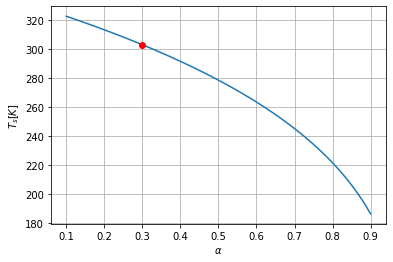

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

T_s_func = lambda albedo: (2*(1-albedo)*S/(4*sigma))**(1/4) # K
albedo_range = np.linspace(0.1, 0.9, 100)
T_s_range = [T_s_func(a) for a in albedo_range]

plt.plot(albedo_range, T_s_range)
plt.plot(albedo, T_s, 'ro')
plt.xlabel('$\\alpha$')
plt.ylabel('$T_s [K]$')
plt.grid()
plt.show()

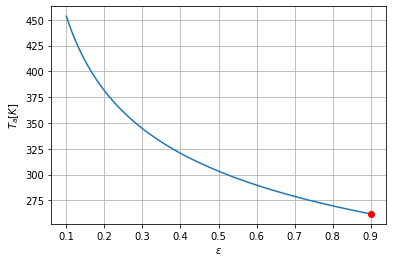

In [ ]:
T_a_func = lambda emissivity: (T_s**4 / (2 * emissivity))**(1/4) # K
emissivity_range = np.linspace(0.1, 0.9, 100)
T_a_range = [T_a_func(e) for e in emissivity_range]

plt.plot(emissivity_range, T_a_range)
plt.plot(emissivity_a, T_a, 'ro')
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_a [K]$')
plt.grid()
plt.show()

Interestingly, increasing emissivity does not seem to have an effect on the surface temperature in our simple climate model. We know from experimental data that increasing CO$_2$ in the atmosphere does increase this effective emissivity, causing a corresponding increase in temperature of the total system.

Additional questions:

1.   With climate change, what term(s) are affected in the above equations when we add carbon dioxide? i.e. what is driving the increase in surface temperature?
2.   In what ways is this model overly simplistic?


## Further Reading:

1.   [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook/home.html) - a great open-source course on climate science through a computational lens.
2.   [IPCC AR6 Report](https://www.ipcc.ch/report/ar6/wg1/) - state of understanding of anthropogenic climate change and its effects.

